**Introduction**<br>
A Brain Stroke is a condition when the supply of blood to a portion of the brain is interrupted. The brain cells thus begin to die. It is critical and needs to be given immediate treatment. Brain stroke causes several symptoms such as trouble walking, speaking, and understanding, as well as paralysis or numbness of the face, arm, or leg. According to the World Health Organization (W.H.O), about 15 million people suffer stroke worldwide yearly. And According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. So by Using an artificial neural network, this projects tries to create a classification model which can predict wether or not a given person is in danger of recieving a heart attack.

**Goal**<br>
The Goal of this notebook is to predict wether or not a given person, is in danger of being the victim of a stroke in the future. To achieve this I will be creating an artificial neural network. As this project is purely for studying, I will not be setting an acceptence-goal. I will however still try to create an accuracte model.

**NOTE:**<br>
I've just learned the technique SMOTE. The first part of the modelling-phase will be trying to apply a machine learning model on a heavily imbalanced dataset. In the second part I will apply SMOTE before training the ANN.

**Dataset**<br>
The data has been found on data: <br>
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

**Features**<br>
Features in this dataset includes: <br>
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not

**NOTE**: "Unknown" in smoking_status means that the information is unavailable for this patient

In [260]:
# Colab library to upload files to notebook
from google.colab import files
# Install Kaggle library
!pip install -q kaggle

In [261]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [262]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 24.2MB/s]


In [263]:
!unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


#Preperation

In [264]:
#Import baseline tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import keras
import tensorflow as tf

In [265]:
#Import data
df_baseline = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df_baseline
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Baseline information

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [267]:
X_values = df.columns
X_values

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [268]:
y_values = []

for column in X_values:
  y_values.append(df[column].count())

y_values

[5110, 5110, 5110, 5110, 5110, 5110, 5110, 5110, 5110, 4909, 5110, 5110]

<BarContainer object of 12 artists>

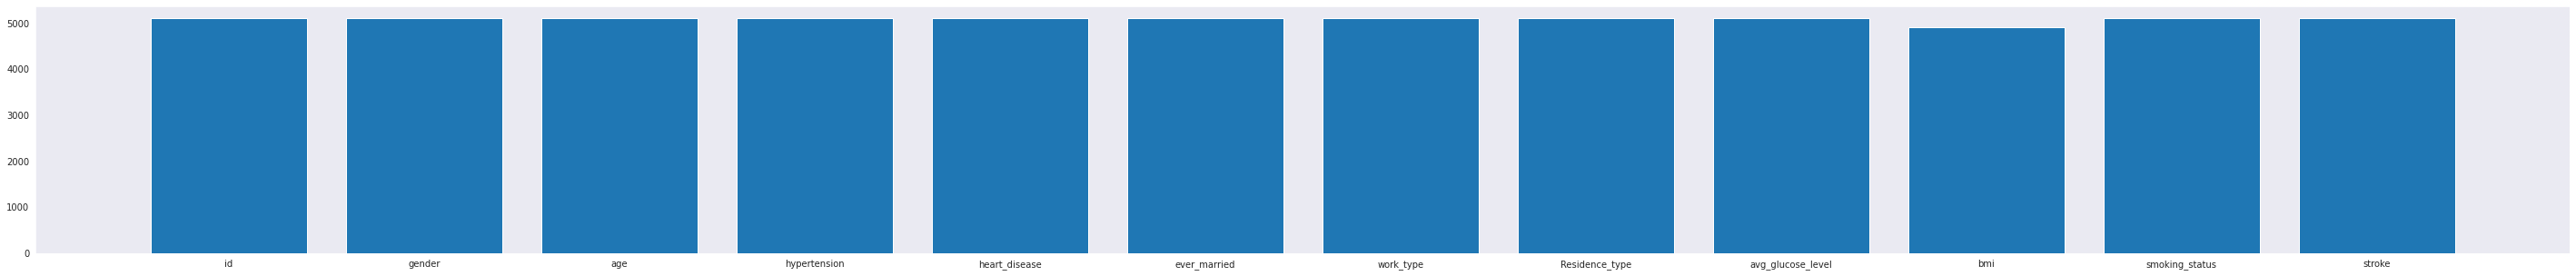

In [269]:
fig, ax = plt.subplots(figsize=(50,5))
ax.bar(X_values,y_values)

## Value-count of gender-, age- and stroke-columns

In [270]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

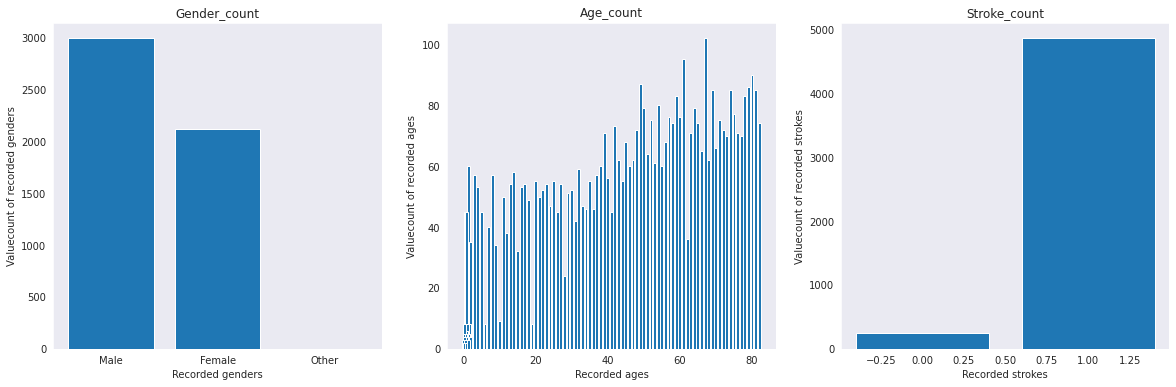

In [271]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,
                                  ncols=3,
                                  figsize=(20,6))

ax1.set(title="Gender_count",
        xlabel="Recorded genders",
        ylabel="Valuecount of recorded genders")
ax1.bar(df["gender"].unique(),
        df["gender"].value_counts())

ax2.set(title="Age_count",
        xlabel="Recorded ages",
        ylabel="Valuecount of recorded ages")
ax2.bar(df["age"].unique(),
        df["age"].value_counts())

ax3.set(title="Stroke_count",
        xlabel="Recorded strokes",
        ylabel="Valuecount of recorded strokes")
ax3.bar(df["stroke"].unique(),
        df["stroke"].value_counts());

**Thoughts about the plots above:**<br>
- Gender-column is somewhat balanced <br>
- Stroke-column - the majority of the samples in this columns haven't had a stroke. <br>
- Age-column is somewhat balanced, but with a higher count towards the higher ages - if age and stroke correlates, it might be the reason to why the majority of the stroke samples are positive. I will check if this correlation exist now

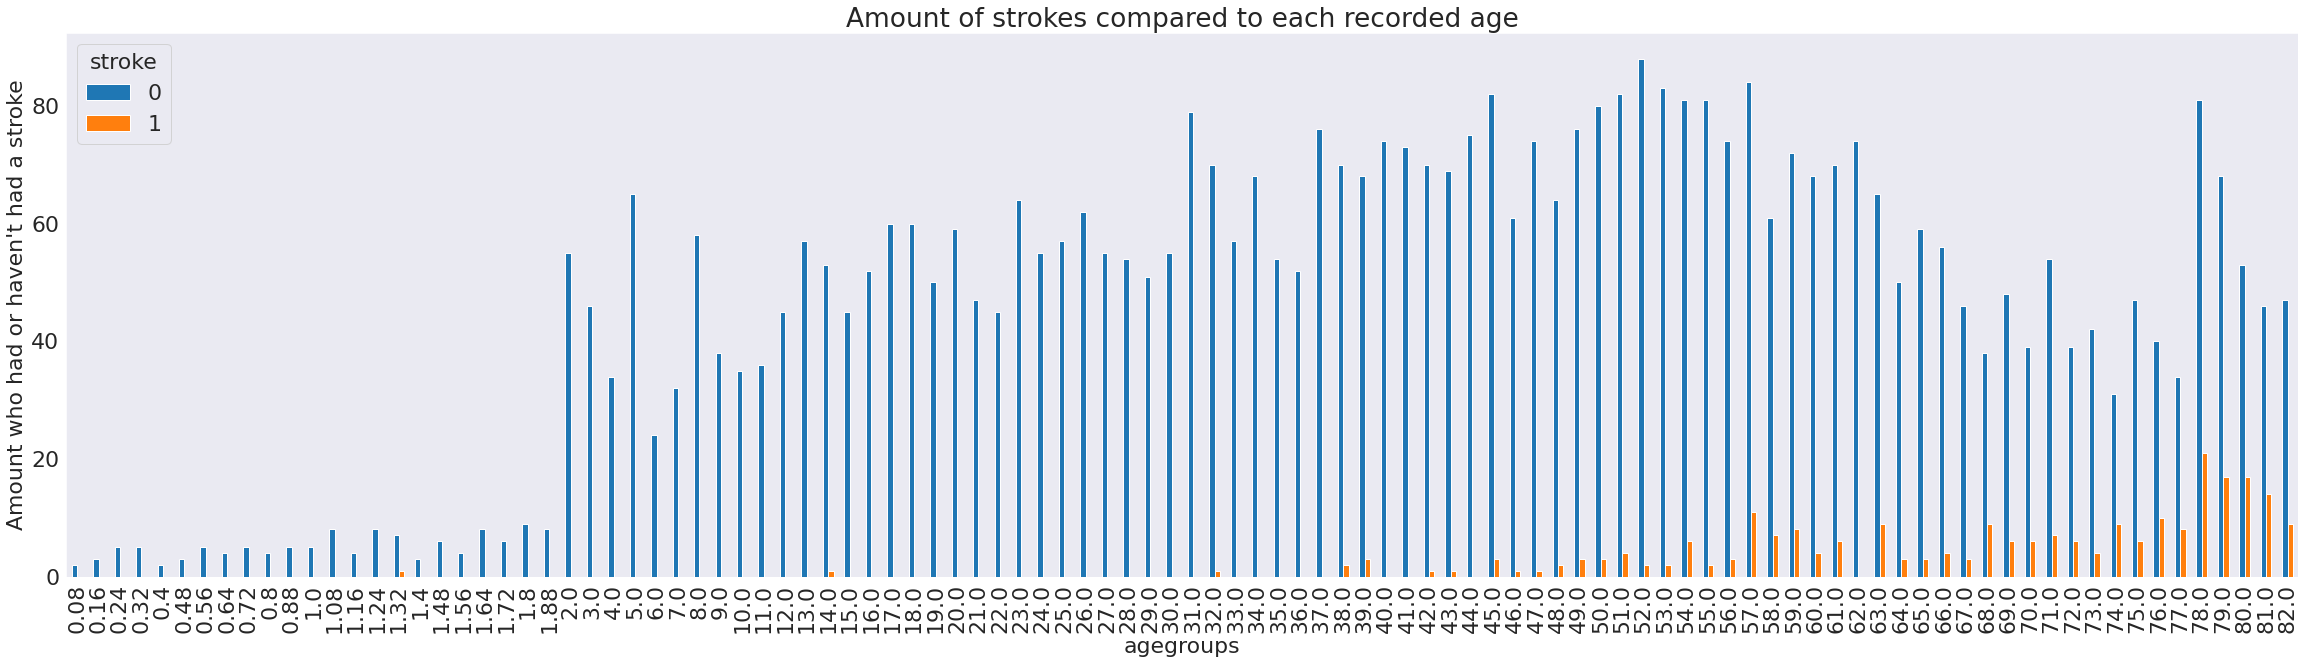

In [272]:
plt.rcParams.update({'font.size': 22})
pd.crosstab(df["age"],df["stroke"]).plot(kind="bar",
                                         figsize=(40,10))

plt.title("Amount of strokes compared to each recorded age");
plt.xlabel("agegroups");
plt.ylabel("Amount who had or haven't had a stroke");

##Compare heart-disease- smoking_status- and stroke-column to eachother

###Compare heart-disease with stroke-column

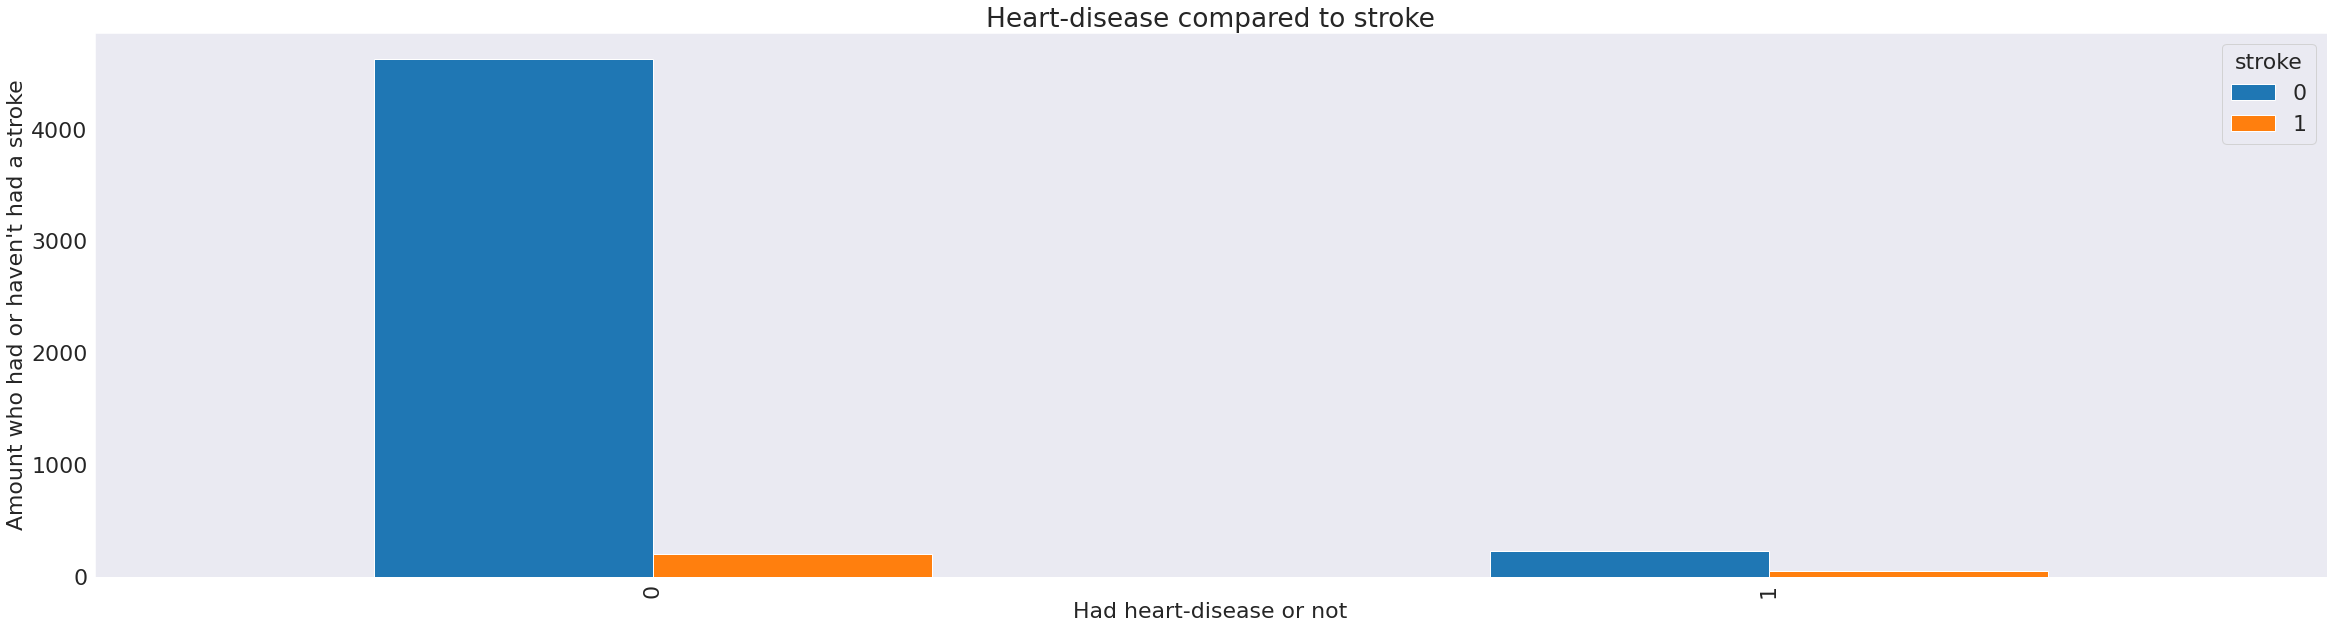

In [273]:
pd.crosstab(df["heart_disease"],df["stroke"]).plot(kind="bar",
                                         figsize=(40,10))

plt.title("Heart-disease compared to stroke");
plt.xlabel("Had heart-disease or not");
plt.ylabel("Amount who had or haven't had a stroke");

## Compare smoking_status with stroke-column

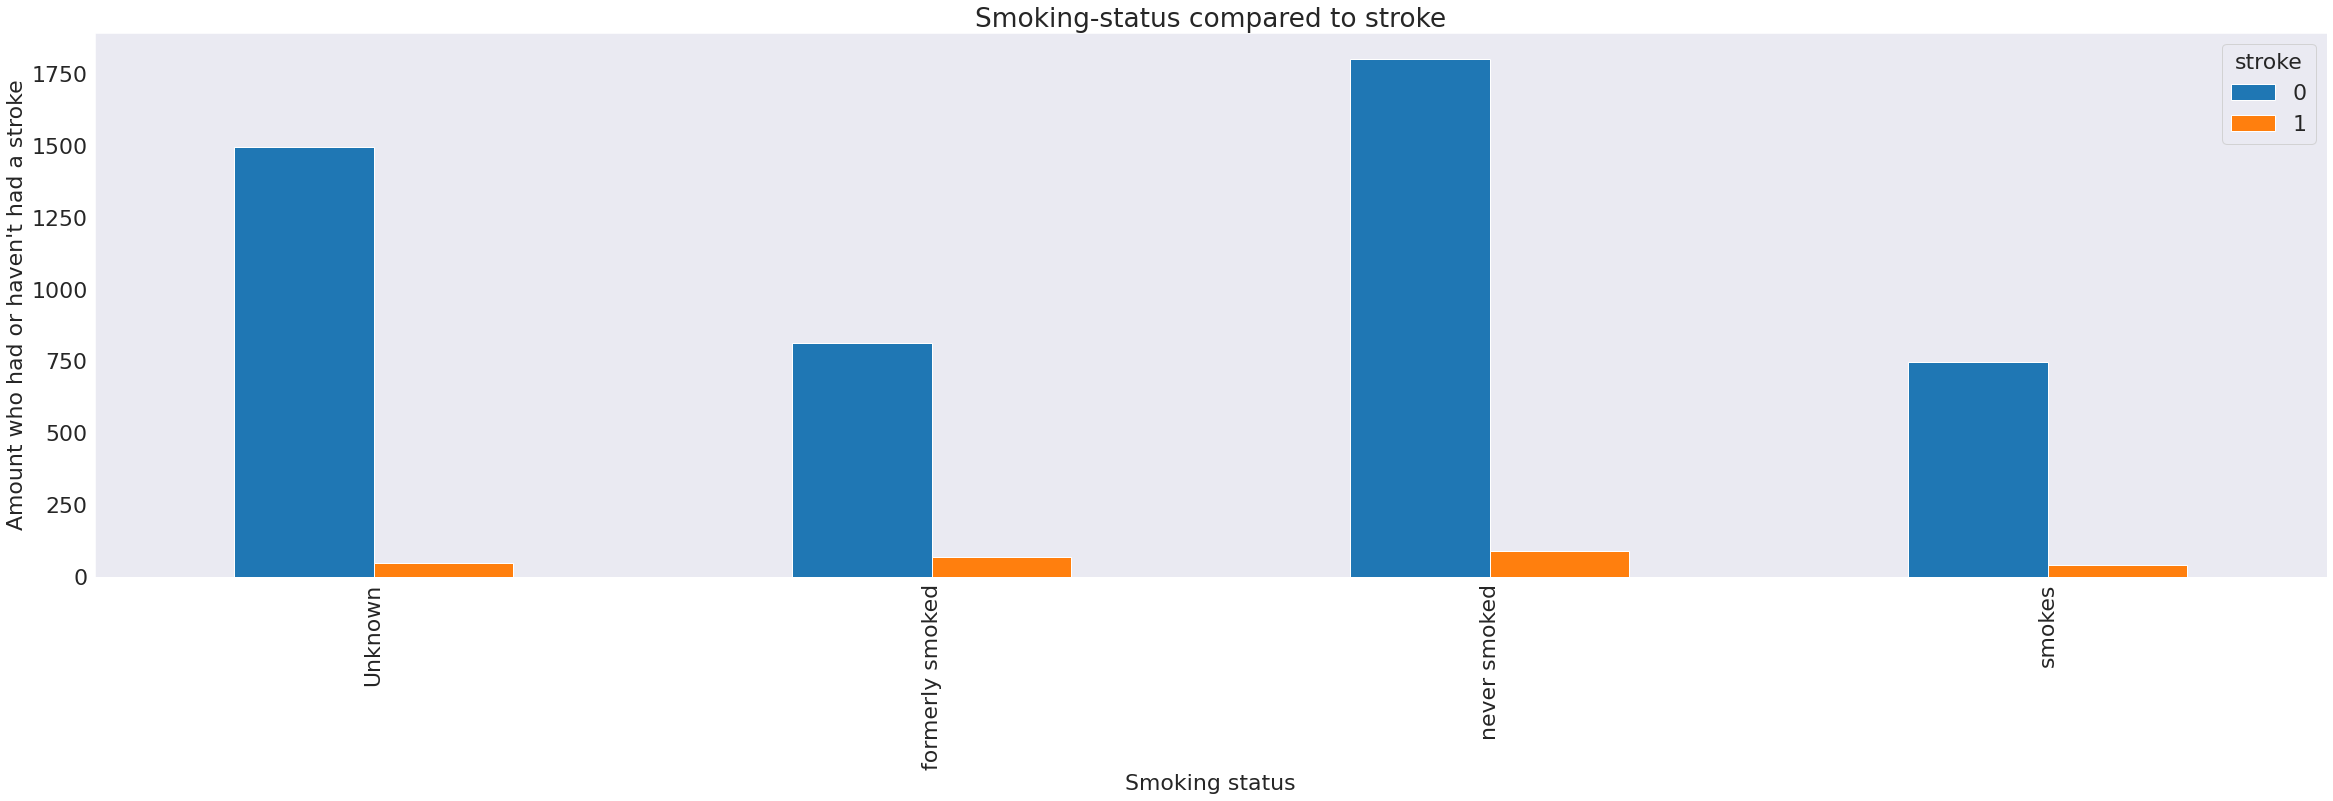

In [274]:
pd.crosstab(df["smoking_status"],df["stroke"]).plot(kind="bar",
                                         figsize=(40,10))

plt.title("Smoking-status compared to stroke");
plt.xlabel("Smoking status");
plt.ylabel("Amount who had or haven't had a stroke");

###Conclusion on plots above

**Heart-disease**<br>
At a first glance, it looks like we simply don't have enough occurences of people having a stroke, to make an assumption to wether or not heart-disease have a strong correlation to strokes. However, if we take a closer look, we can see that if we compare the amount of strokes that happened to people who either had or didn't have a heart disease, the number of stroke-occurences on both sides are actually relatively close. Therefore, if the amount of strokes that happened to people with a heart-disease that fast can sneak up to the amount of people who didn't have a heart-disease, there must be correlation.

**Smoke-status**<br>
The situation here is the same as described above. The amount of people who had a stroke, and either are non-smokers, formerly-smokers or currenct-smokers are very close. Yet the amount of people who do not smoke at all are very high. Therefore, there must be a correlation.


##Compare Hypertension and avg_glucose_level to stroke

**Hyptertension is high blood presure**

###Hyptertension compared to stroke

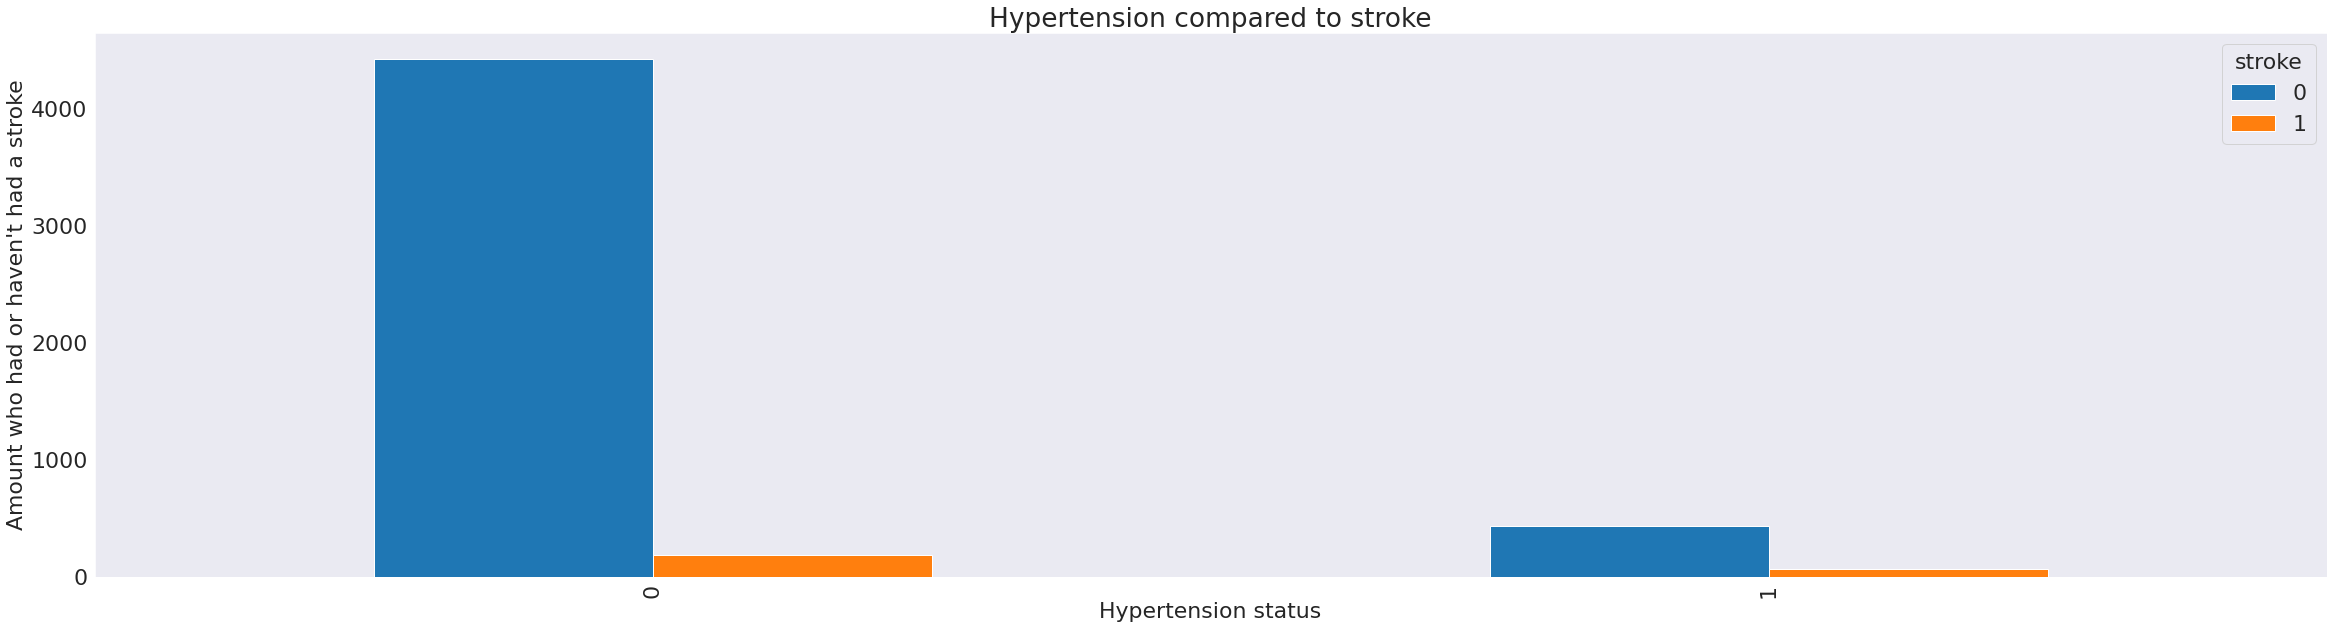

In [275]:
pd.crosstab(df["hypertension"],df["stroke"]).plot(kind="bar",
                                         figsize=(40,10))

plt.title("Hypertension compared to stroke");
plt.xlabel("Hypertension status");
plt.ylabel("Amount who had or haven't had a stroke");

###Avg_glucose_level compared to stroke

In [276]:
print(df["avg_glucose_level"].min())
print(df["avg_glucose_level"].max())

55.12
271.74


In [277]:
glucose_threshold = {"50-89":  [],
                     "90-129": [],
                     "130-169":[],
                     "170-209":[],
                     "210-239":[],
                     "240-279":[]}

for sample in range(len(df)):
  if df.iloc[sample]["avg_glucose_level"] >= 50 and df.iloc[sample]["avg_glucose_level"] < 90:
   glucose_threshold["50-89"].append(df.iloc[sample]["stroke"])

  elif df.iloc[sample]["avg_glucose_level"] >= 90 and df.iloc[sample]["avg_glucose_level"] < 130:
    glucose_threshold["90-129"].append(df.iloc[sample]["stroke"])

  elif df.iloc[sample]["avg_glucose_level"] >= 130 and df.iloc[sample]["avg_glucose_level"] < 170:
    glucose_threshold["130-169"].append(df.iloc[sample]["stroke"])

  elif df.iloc[sample]["avg_glucose_level"] >= 170 and df.iloc[sample]["avg_glucose_level"] < 210:
    glucose_threshold["170-209"].append(df.iloc[sample]["stroke"])

  elif df.iloc[sample]["avg_glucose_level"] >= 210 and df.iloc[sample]["avg_glucose_level"] < 239:
    glucose_threshold["210-239"].append(df.iloc[sample]["stroke"])
  
  elif df.iloc[sample]["avg_glucose_level"] >= 240 and df.iloc[sample]["avg_glucose_level"] < 279:
    glucose_threshold["240-279"].append(df.iloc[sample]["stroke"])

In [278]:
glucose_threshold["50-89"] = pd.Series(glucose_threshold["50-89"]).value_counts()
glucose_threshold["90-129"] = pd.Series(glucose_threshold["90-129"]).value_counts()
glucose_threshold["130-169"] = pd.Series(glucose_threshold["130-169"]).value_counts()
glucose_threshold["170-209"] = pd.Series(glucose_threshold["170-209"]).value_counts()
glucose_threshold["210-239"] = pd.Series(glucose_threshold["210-239"]).value_counts()
glucose_threshold["240-279"] = pd.Series(glucose_threshold["240-279"]).value_counts()

In [279]:
glucose_data = {"50-89_false":glucose_threshold["50-89"][0],
                "50-89_true":glucose_threshold["50-89"][1],
                "90-129_false":glucose_threshold["90-129"][0],
                "90-129_true":glucose_threshold["90-129"][1],
                "130-169_false":glucose_threshold["130-169"][0],
                "130-169_true":glucose_threshold["130-169"][1],
                "170-209_false":glucose_threshold["170-209"][0],
                "170-209_true":glucose_threshold["170-209"][1],
                "210-239_false":glucose_threshold["210-239"][0],
                "210-239_true":glucose_threshold["210-239"][1],
                "240-279_false":glucose_threshold["240-279"][0],
                "240-279_true":glucose_threshold["240-279"][1]}

[Text(0, 0.5, 'Amount recorded'),
 Text(0.5, 0, 'avg_glucose_level-interval and stroke bool for the interval'),
 Text(0.5, 1.0, 'avg_glucose_level compared to stroke occurrence')]

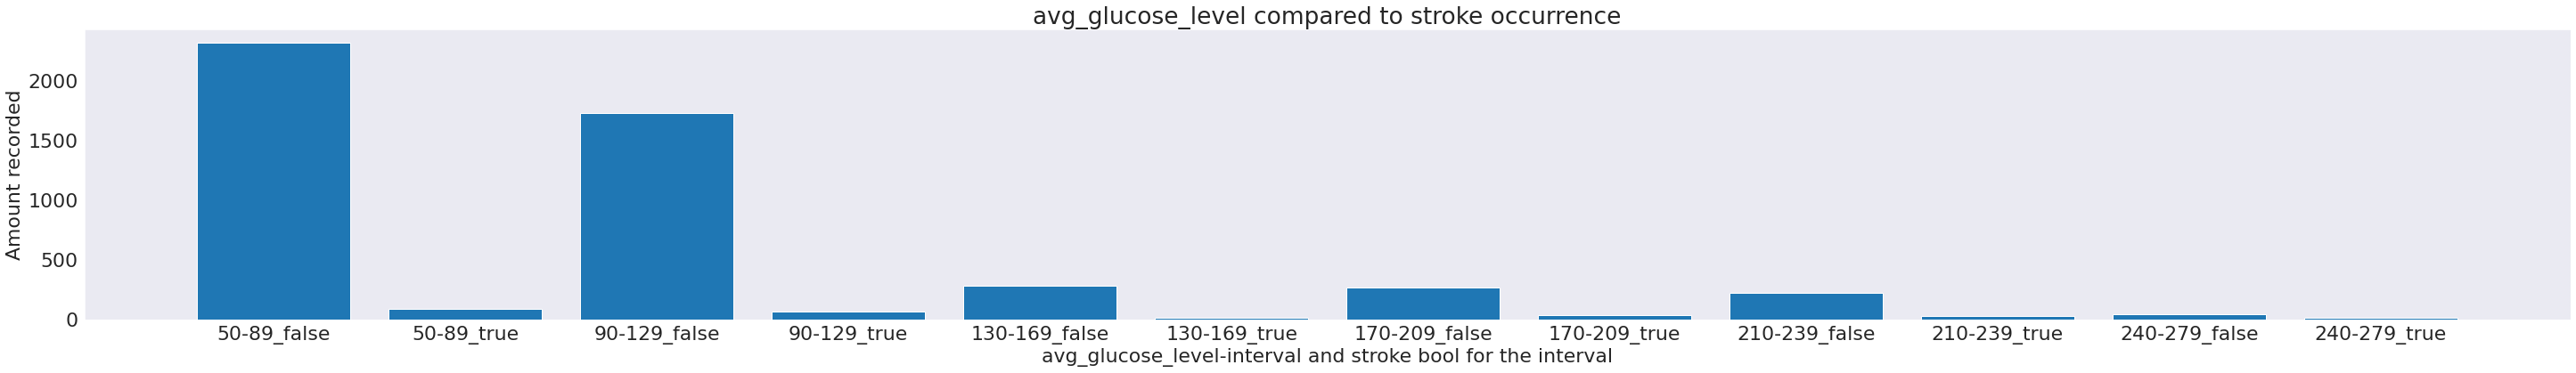

In [280]:
fig, ax = plt.subplots(figsize=(50,6))

ax.bar(glucose_data.keys(),
       glucose_data.values())

ax.set(title="avg_glucose_level compared to stroke occurrence",
       xlabel="avg_glucose_level-interval and stroke bool for the interval",
       ylabel="Amount recorded")

### Conclusion on plots above

Both avg_clucose_level and heart_disease clearly correlates to the occurence of heart attack (that is, if the theory mentioned at the first few plots is correct)

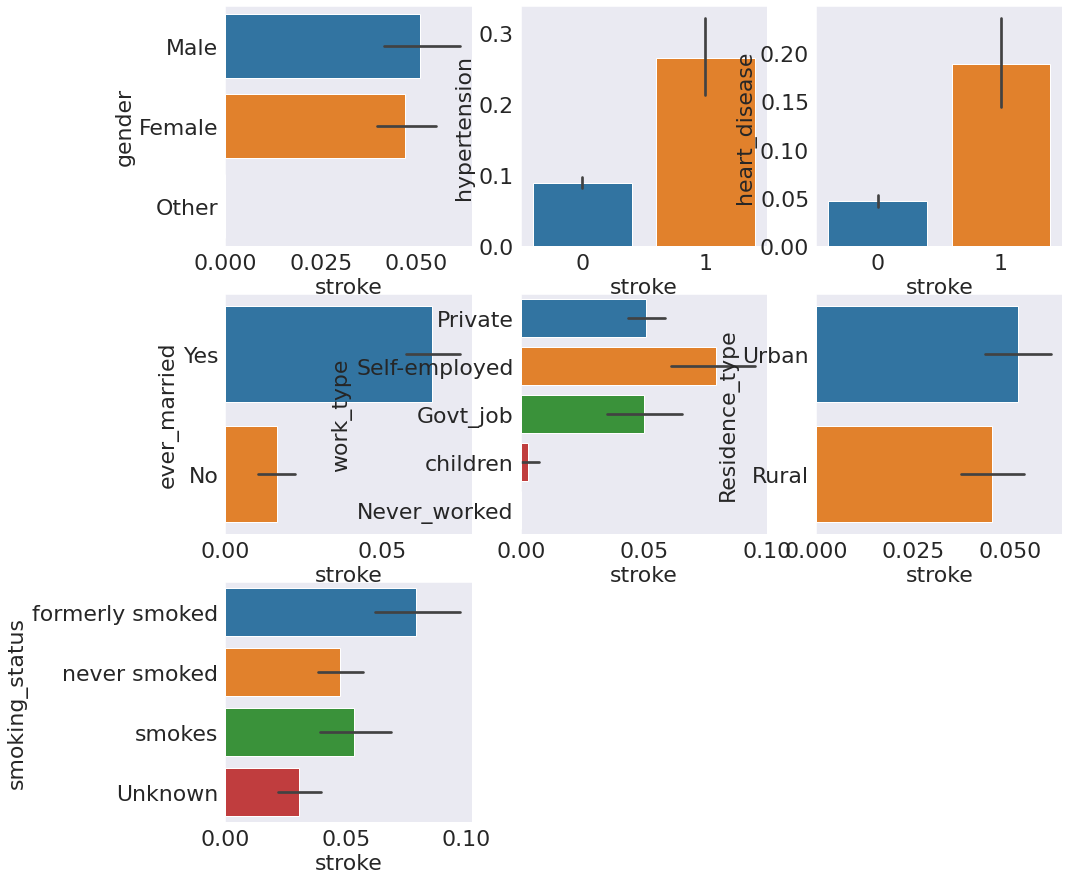

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark')

fig = plt.figure(figsize = [15, 15])

# Plotting the independent variables with the target variable
cat = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type','smoking_status']
count = 1

# Generating the plots
for col in cat :
    plt.subplot(3,3,count)
    sns.barplot(data = df, x = 'stroke', y = col)
    count+=1 
plt.show()


Histogram Plot

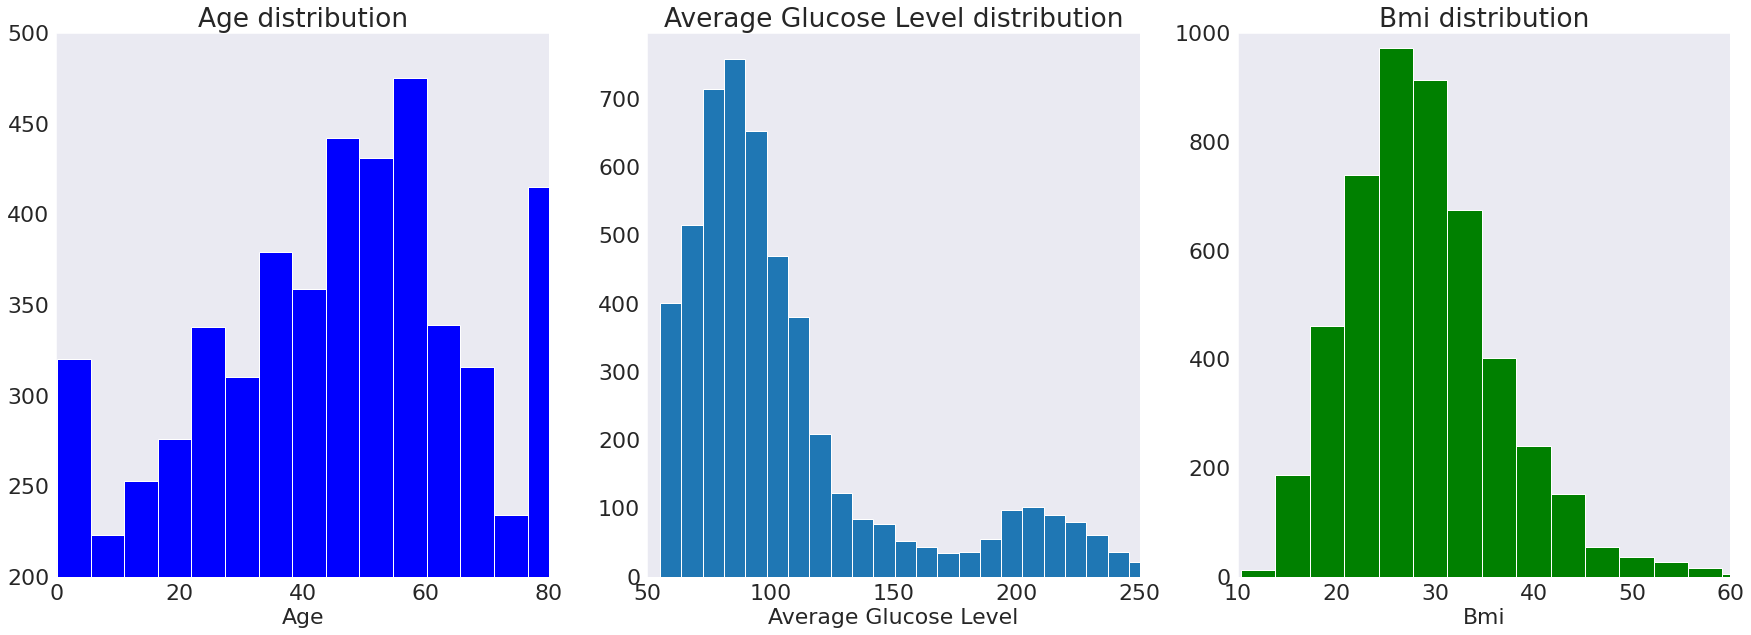

In [282]:
fig, (ax0,ax1,ax2)=plt.subplots(nrows=1,
                                ncols=3,
                                figsize=(30,10))

# AGE DISTRIBUTION 
ax0.hist(df['age'],
         bins=15,
         color='blue')
ax0.set_ylim([200,500])
ax0.set_xlim([0,80])
ax0.set_xlabel('Age')
ax0.set_title('Age distribution')

# AVG GLUCOSE LEVEL DISTRIBUTION
ax1.hist(df['avg_glucose_level'],
         bins=25)
ax1.set_xlabel('Average Glucose Level')
ax1.set_xlim([50,250])
ax1.set_title('Average Glucose Level distribution')

# BMI DISTRIBUTION
ax2.hist(df['bmi'],
         bins=25,
         color='green')
ax2.set_xlabel('Bmi')
ax2.set_ylim([0,1000])
ax2.set_xlim([10,60])
ax2.set_title('Bmi distribution')

fig.show()

Pie Chart

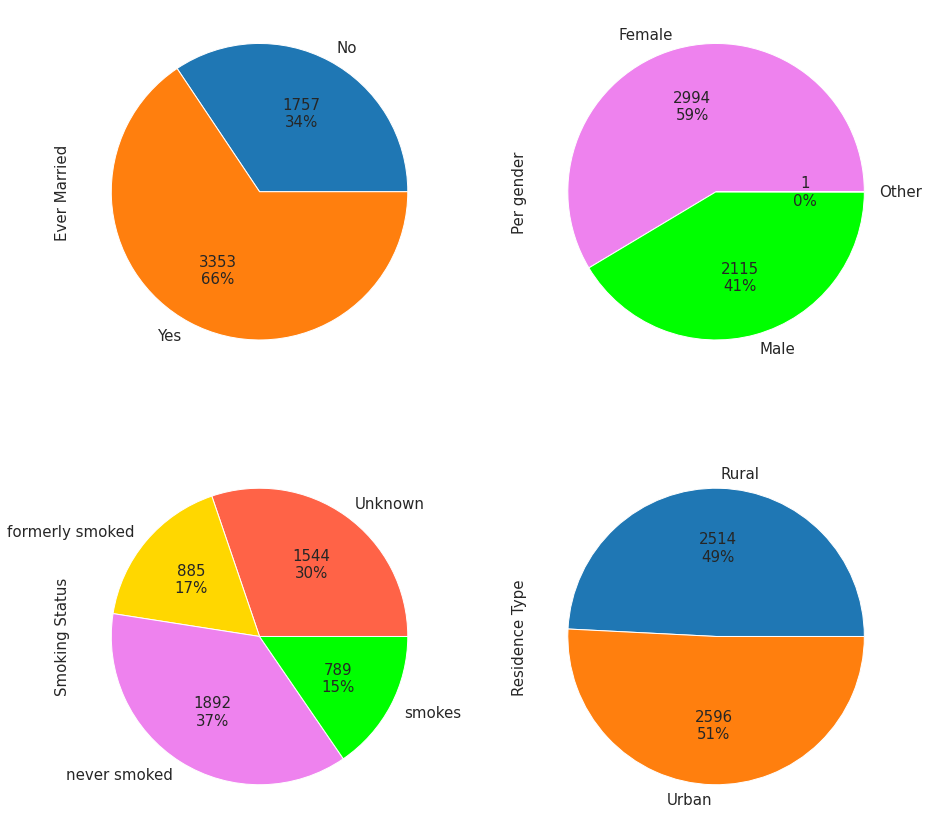

In [283]:
fig, ((ax0,ax1),(ax2,ax3))=plt.subplots(nrows=2,
                                       ncols=2,
                                       figsize=(15, 15))
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

# EVER MARRIED
df.groupby('ever_married').size().plot(kind='pie', 
                                              autopct=label_function,
                                              textprops={'fontsize': 15},
                                              ax=ax0)
ax0.set_ylabel('Ever Married',size=15)

# GENDER
df.groupby('gender').size().plot(kind='pie', 
                                      autopct=label_function, 
                                      textprops={'fontsize': 15},
                                      colors=['violet', 'lime','tomato'],
                                      ax=ax1)
ax1.set_ylabel('Per gender',size=15)

# SMOKING STATUS
df.groupby('smoking_status').size().plot(kind='pie',
                                                 autopct=label_function, 
                                                 textprops={'fontsize': 15},
                                                 colors=['tomato', 'gold','violet','lime'],
                                                 ax=ax2)
ax2.set_ylabel('Smoking Status',size=15)

# RESIDENCE TYPE 
df.groupby('Residence_type').size().plot(kind='pie',
                                                 autopct=label_function, 
                                                 textprops={'fontsize': 15},
                                                 ax=ax3)                                         
ax3.set_ylabel('Residence Type',size=15)

# showing the figure
fig.show()

### Exploratory Data Analysis on Stroke Prediction Data

- Check if the Data is Balanced

- Plotting various graphs to check relation between the each column with respect to stroke
- Age vs BMI with Stroke as hue
- BMI vs Avg Glucose Level
- Percentage of people who got stroked in each category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


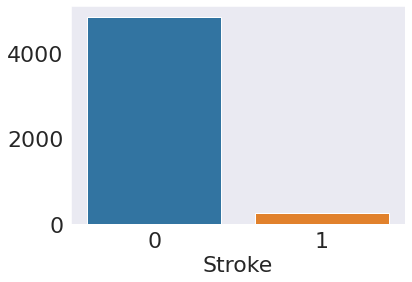

In [284]:
# Checking if Data is balanced
xs = df['stroke'].value_counts().index
ys = df['stroke'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("Stroke")
plt.show()

As we can see from the above plot that the Data is not balanced which will result in a bad model. To resolve this issue we can use SMOTE to balance the Data. This is will done before fitting our data to the model.



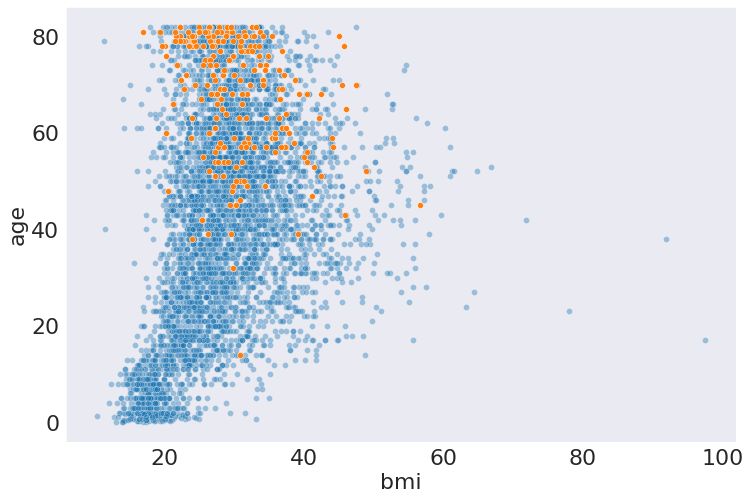

In [285]:
# Age vs BMI with hue = stroke
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="age", alpha=0.4, data=df[df['stroke'] == 0])
sns.scatterplot(x="bmi", y="age", alpha=1, data=df[df['stroke'] == 1], ax=ax)
plt.show()

From the above Age vs BMI plot we can clearly see that when people attain an age of 40 or greater the chances of getting a stroke increases and after 60+ it tends to increase even more. Also, people with a BMI of 25+ have shown a higher chances of encountering a stroke.

So, people with 40+ years and BMI of 25+ have a greater probability of encountering a stroke.

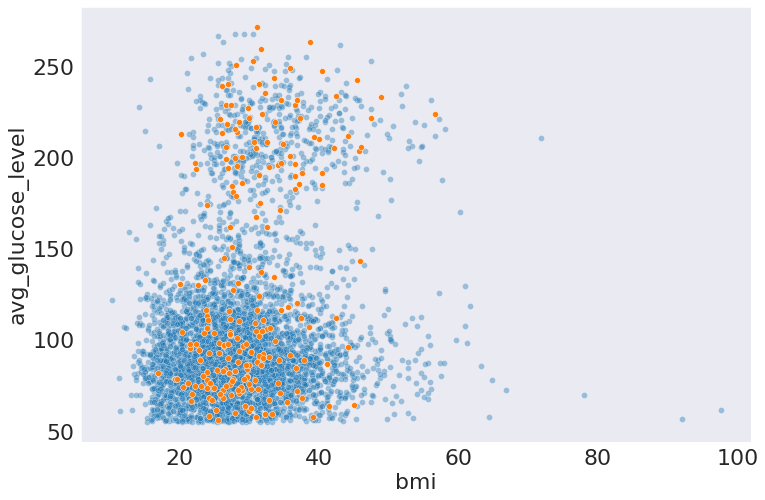

In [286]:
# Age vs BMI with hue = stroke
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=0.4, data=df[df['stroke'] == 0])
sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=1, data=df[df['stroke'] == 1], ax=ax)
plt.show()

#Data preperation

##Data removal

###Remove Uncesseray columns

####ID

I need to check wether or not the same ID's occurs multiple time. If they do, there might be some data patterns related to them. If each ID only occurs once I will remove them.

In [287]:
len(df["id"].value_counts())

5110

In [288]:
len(df)

5110

In [289]:
#We have 5110 unique ID's in a dataset with a length of 5110. Each ID only occurs
#once, so I will remove them.

df = df.drop("id",axis=1)

In [290]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


####Thoughts about BMI

In this dataset, the BMI is the only way of analyzing each samples corrilation of height and weights - therefore it's an important feature. The problem with BMI is, that it is calculated as: 

BMI = weight(kg)/height(m)^2. 

It doesn not take into account, that the majority of the weight might either be fat or musclemass. In that regard, BMI cannot tell us wether a person is healthy or not without looking at their workout rutine. Because of this, we might have samples with a high BMI, but of which the person the sample belongs to, is highly active have a lot of muscle mass. If that person suffers from a heart attack, it most likely will not be because of the BMI, however, the machine learning model doesn't have any way of know that. 

I have decided to let the BMI stay, because the majority of the samples lie in an age-group, where people usually don't spend most of their time doing bodybuilding. If the model ends up being unaccurate, one of the first changes I might make is to make some sort of change to the BMI-column.

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


##Deal with NaN

####BMI

The only missing values belong to the bmi-column. As usualy with NaN, there are two options: remove the samples, or fill out the NaN with something else.

Since bmi is a calculation based on height and weights, and since height and weights correlates to age (of which I have a wide range of in this dataset), I have decided to remove the samples i which bmi is NaN.

I could've splitted samples into age-groups, and then iterate through the age-groups and fill out the NaN-bmi with the mean of the bmi within that age-group - this would've been a solution if a majority of the samples in the BMI-column was NaN. But since it's only 200 samples out of the 5100, I will remove them instead.

In [292]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [293]:
df.dropna(inplace=True)

In [294]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Check outliers

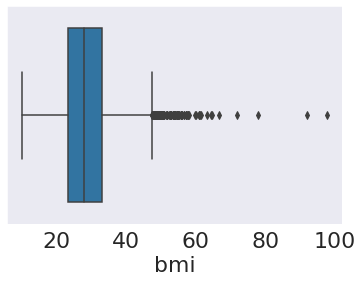

In [295]:
sns.boxplot(x='bmi',data=df)

In [296]:
def remove_outliers(data):
    arr=[]
    #print(max(list(data)))
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    mi=q1-(1.5*iqr)
    ma=q3+(1.5*iqr)
    #print(mi,ma)
    for i in list(data):
        if i<mi:
            i=mi
            arr.append(i)
        elif i>ma:
            i=ma
            arr.append(i)
        else:
            arr.append(i)
    #print(max(arr))
    return arr

In [297]:
df['bmi']=remove_outliers(df['bmi'])

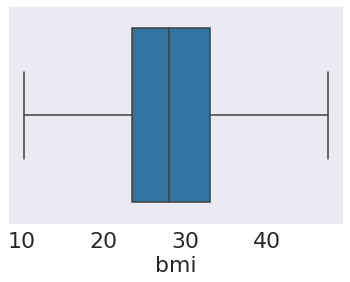

In [298]:
sns.boxplot(x='bmi',data=df)

###Thoughs about gender-column

During the DEA, the gender-plot showed there's a section called "other". However, it looked like a very small amount of samples belonged to that category. I will find the specific value_count and most likely remove the samples which belongs to that category.

In [299]:
df["gender"].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [300]:
df = df[df["gender"] != "Other"]

In [301]:
df["gender"].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

## now for smokking column

In [302]:
df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [303]:
df['smoking_status'].replace('Unknown', df['smoking_status'].mode()[0], inplace = True)

In [304]:
df['smoking_status'].value_counts()

never smoked       3335
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [305]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


##Split data into X and y

In [306]:
X = df.drop("stroke",axis=1)
y=df["stroke"]

In [307]:
X[:5]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [308]:
y[:5]

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [309]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 421.8+ KB


##Deal with non-numerical values

As shown below, we have the following columns which fall under the "object" datatype:

- gender
- ever_married
- work_type
- Residence_type
- smoking_status

Depending on the value_counts() for each feature, I will either use label encoding on the features with binary-values or one-hot encoding on the features with multiple values.

In [310]:
object_columns = ["gender","ever_married","work_type","Residence_type","smoking_status"]
binary_features = []
multiple_features = []

for column in object_columns:
  if len(df[column].value_counts()) == 2:
    binary_features.append(column)
  else:
    multiple_features.append(column)

In [311]:
binary_features

['gender', 'ever_married', 'Residence_type']

In [312]:
multiple_features

['work_type', 'smoking_status']

###Label Encoding

**Label encoding will be done on the binary columns:**<br>
- gender
- ever_married
- residence_type


In [313]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [314]:
 binary_features

['gender', 'ever_married', 'Residence_type']

In [315]:
gender_label_encoder = LabelEncoder()
ever_married_label_encoder = LabelEncoder()
residence_type_label_encoder = LabelEncoder()

In [316]:
X["gender"] = gender_label_encoder.fit_transform(X["gender"])
X["ever_married"] = ever_married_label_encoder.fit_transform(X["ever_married"])
X["Residence_type"] = residence_type_label_encoder.fit_transform(X["Residence_type"])

In [317]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked


###OneHot Encoding

In [318]:
multiple_features

['work_type', 'smoking_status']

In [319]:
work_type_onehot_encoder = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[5])], remainder="passthrough")
X=np.array(work_type_onehot_encoder.fit_transform(X))

In [320]:
X[:5]

array([[0.0, 0.0, 1.0, 0.0, 0.0, 1, 67.0, 0, 1, 1, 1, 228.69, 36.6,
        'formerly smoked'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1, 80.0, 0, 1, 1, 0, 105.92, 32.5,
        'never smoked'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0, 49.0, 0, 0, 1, 1, 171.23, 34.4,
        'smokes'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0, 79.0, 1, 0, 1, 0, 174.12, 24.0,
        'never smoked'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1, 81.0, 0, 0, 1, 1, 186.21, 29.0,
        'formerly smoked']], dtype=object)

In [321]:
smoking_status_onehot_encoder = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[13])], remainder="passthrough")
X=np.array(smoking_status_onehot_encoder.fit_transform(X))

In [322]:
X[:5]

array([[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67.0, 0, 1, 1, 1,
        228.69, 36.6],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 80.0, 0, 1, 1, 0,
        105.92, 32.5],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0, 49.0, 0, 0, 1, 1,
        171.23, 34.4],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 79.0, 1, 0, 1, 0,
        174.12, 24.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 81.0, 0, 0, 1, 1,
        186.21, 29.0]], dtype=object)

##Normalize data

In [323]:
from sklearn.preprocessing import MinMaxScaler

In [324]:
min_max_scaler = MinMaxScaler()

In [325]:
X = min_max_scaler.fit_transform(X)

In [326]:
X[:5]

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.81689453,
        0.        , 1.        , 1.        , 1.        , 0.80126489,
        0.70698925],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.97558594,
        0.        , 1.        , 1.        , 0.        , 0.23451205,
        0.59677419],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.59716797,
        0.        , 0.        , 1.        , 1.        , 0.53600776,
        0.64784946],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.96337891,
        1.        , 0.        , 1.        , 0.        , 0.54934909,
        0.36827957],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 

#Modeling

##Without SMOTE

###Split data into training and validation sets

In [327]:
from sklearn.model_selection import train_test_split

In [328]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [329]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3926, 16), (3926,), (982, 16), (982,))

###Create and compile ANN

In [330]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.objectives import BinaryCrossentropy

In [331]:
#Create ANN
ann = Sequential([
                  Dense(units=5, activation="relu"),
                  Dense(units=1, activation="sigmoid")
])

In [332]:
#compile ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

###Train ANN

In [333]:
ann.fit(x=X_train,y=y_train,batch_size=32,epochs=100,verbose=2)

Epoch 1/100
123/123 - 1s - loss: 0.3741 - accuracy: 0.9480
Epoch 2/100
123/123 - 0s - loss: 0.2379 - accuracy: 0.9603
Epoch 3/100
123/123 - 0s - loss: 0.2052 - accuracy: 0.9603
Epoch 4/100
123/123 - 0s - loss: 0.1962 - accuracy: 0.9603
Epoch 5/100
123/123 - 0s - loss: 0.1909 - accuracy: 0.9603
Epoch 6/100
123/123 - 0s - loss: 0.1860 - accuracy: 0.9603
Epoch 7/100
123/123 - 0s - loss: 0.1815 - accuracy: 0.9603
Epoch 8/100
123/123 - 0s - loss: 0.1770 - accuracy: 0.9603
Epoch 9/100
123/123 - 0s - loss: 0.1725 - accuracy: 0.9603
Epoch 10/100
123/123 - 0s - loss: 0.1679 - accuracy: 0.9603
Epoch 11/100
123/123 - 0s - loss: 0.1637 - accuracy: 0.9603
Epoch 12/100
123/123 - 0s - loss: 0.1603 - accuracy: 0.9603
Epoch 13/100
123/123 - 0s - loss: 0.1576 - accuracy: 0.9603
Epoch 14/100
123/123 - 0s - loss: 0.1556 - accuracy: 0.9603
Epoch 15/100
123/123 - 0s - loss: 0.1540 - accuracy: 0.9603
Epoch 16/100
123/123 - 0s - loss: 0.1525 - accuracy: 0.9603
Epoch 17/100
123/123 - 0s - loss: 0.1515 - accura

###Evaluate model

###Confusion matrix

In [334]:
y_preds = ann.predict(X_test)

In [335]:
y_preds[:5]

array([[0.0084675 ],
       [0.01259022],
       [0.08357748],
       [0.00878401],
       [0.02933559]], dtype=float32)

In [336]:
y_preds = (y_preds > 0.75)

In [337]:
y_preds[:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

In [338]:
  from sklearn.metrics import confusion_matrix,accuracy_score

In [339]:
y_test

4857    0
3709    0
964     0
2971    0
3262    0
       ..
1022    0
205     1
3838    0
4524    0
2049    0
Name: stroke, Length: 982, dtype: int64

In [340]:
cm = confusion_matrix(y_test,y_preds)

In [341]:
cm

array([[929,   0],
       [ 53,   0]])

In [342]:
accuracy_score(y_test,y_preds)

0.9460285132382892

In [343]:
#creating dummy variables for categorical data
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
df = pd.get_dummies(df, columns=['ever_married'], drop_first=True)
df = pd.get_dummies(df, columns=['Residence_type'], drop_first=True)
df = pd.get_dummies(df, columns=['work_type'], drop_first=True)
df = pd.get_dummies(df, columns=['smoking_status'], drop_first=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,1,0,1,0,0,0,0
2,80.0,0,1,105.92,32.5,1,1,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,1,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,0,1,0,1,0
5,81.0,0,0,186.21,29.0,1,1,1,1,0,1,0,0,0,0


In [344]:
X = df.drop('stroke', axis = 1).values
y = df['stroke'].values

In [345]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [346]:
#Scale and Fit the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [347]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [348]:
X_train.shape

(3435, 14)

## ANN MODEL

In [349]:

model = Sequential()

model.add(Dense(units = 15, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [350]:
from tensorflow.keras.callbacks import EarlyStopping
#stops when validation loss is not dropping for 3 epochs
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10, verbose = 1)

In [351]:
#Fitting model
model.fit(X_train, y_train, 
          epochs = 800,
         validation_data=(X_test, y_test),
         verbose = 1, 
         callbacks=[early_stop])

Epoch 1/800
108/108 [==============================] - 1s 4ms/step - loss: 0.6781 - val_loss: 0.3889
Epoch 2/800
108/108 [==============================] - 0s 3ms/step - loss: 0.2933 - val_loss: 0.2054
Epoch 3/800
108/108 [==============================] - 0s 3ms/step - loss: 0.2127 - val_loss: 0.1928
Epoch 4/800
108/108 [==============================] - 0s 3ms/step - loss: 0.1960 - val_loss: 0.1850
Epoch 5/800
108/108 [==============================] - 0s 3ms/step - loss: 0.1831 - val_loss: 0.1777
Epoch 6/800
108/108 [==============================] - 0s 3ms/step - loss: 0.1710 - val_loss: 0.1745
Epoch 7/800
108/108 [==============================] - 0s 3ms/step - loss: 0.1668 - val_loss: 0.1701
Epoch 8/800
108/108 [==============================] - 0s 3ms/step - loss: 0.1845 - val_loss: 0.1688
Epoch 9/800
108/108 [==============================] - 0s 3ms/step - loss: 0.1611 - val_loss: 0.1661
Epoch 10/800
108/108 [==============================] - 0s 3ms/step - loss: 0.1622 - val_lo

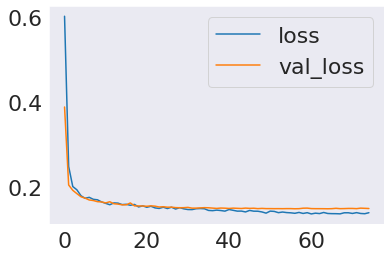

In [352]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [353]:
#Predictions
prediction = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [354]:
#Accuracy Reports
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,prediction))
print()
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.00      0.00      0.00        72

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473


[[1401    0]
 [  72    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LSTM model 

In [355]:

import os
import numpy as np
import pandas as pd
import random, math
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle as skshuffle
from sklearn.model_selection import train_test_split as sk_train_test_split
from tensorflow.keras.layers import Convolution1D, Dense, Flatten, GlobalAveragePooling1D, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Conv2D
from tensorflow.keras.layers import Dropout, AveragePooling2D, LSTM, GRU
from sklearn.metrics import mean_squared_error
from time import time
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

from tensorflow.keras import regularizers

os.environ["PYTHONHASHSEED"] = "0"
np.random.seed(64)
random.seed(64)
tf.compat.v1.set_random_seed(64)
from keras import backend as K
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph())
from tensorflow.compat.v1.keras import backend as K
K.set_session(sess)

In [356]:
n_features= X.shape[1]

In [357]:
X_train= np.array(X_train).reshape(len(X_train), 1, n_features)
X_test= np.array(X_test).reshape(len(X_test), 1, n_features)

In [358]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train),y_train)
class_weights = dict(enumerate(class_weights))

In [359]:
model2 = Sequential()
model2.add(LSTM(50, return_sequences=True, input_shape=(1, X_train.shape[2])))
# model.add(Dropout(0.2))
model2.add(LSTM(25, return_sequences=False))

model2.add(Dense(1, activation='sigmoid'))
from tensorflow.keras.optimizers import SGD
# model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['binary_accuracy'])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()
# fit model
model2.fit(X_train, y_train, epochs=20, batch_size=32, class_weight=class_weights, shuffle=True)
# 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 50)             13000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 26        
Total params: 20,626
Trainable params: 20,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
108/108 [==============================] - 3s 4ms/step - loss: 0.7164 - accuracy: 0.1380
Epoch 2/20
108/108 [==============================] - 0s 4ms/step - loss: 0.6250 - accuracy: 0.5372
Epoch 3/20
108/108 [==============================] - 0s 4ms/step - loss: 0.5889 - accuracy: 0.6045
Epoch 4/20
108/108 [==============================] - 0s 4ms/step - loss: 0.561

In [360]:
predictions= model2.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [361]:
sum(predictions)

array([524], dtype=int32)

In [362]:
from sklearn.metrics import f1_score
print(f1_score(y_test, predictions, average = 'binary'))

0.2181208053691275


In [363]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))


0.6836388323150034


In [364]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1401
           1       0.12      0.90      0.22        72

    accuracy                           0.68      1473
   macro avg       0.56      0.79      0.51      1473
weighted avg       0.95      0.68      0.77      1473



##With SMOTE

As we saw earlier that data is Imbalanced. To make it balanced we use a technique called as SMOTE (Synthetic Minority Oversampling Technique). There are other techniques like NearMiss Algorithm. But I prefer SMOTE. The major difference between SMOTE and NMA is that SMOTE increases number of sample of minority classes by linear interpolation. Whereas the later one randomly eliminates majority class examples. When instances of two different classes are very close to each other.

###Increase number of minority using SMOTE

In [365]:
!pip install imbalanced-learn

In [366]:
from imblearn.over_sampling import SMOTE

In [367]:
print(np.count_nonzero(y==0))
print(np.count_nonzero(y==1))

4699
209


In [368]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [370]:
X.shape,X_sm.shape,y.shape,y_sm.shape

((9398, 14), (9398, 14), (9398,), (9398,))

In [371]:
print(np.count_nonzero(y_sm==0))
print(np.count_nonzero(y_sm==1))

4699
4699


###Split data into training and validation sets

In [372]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=42)

In [373]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7518, 14), (1880, 14), (7518,), (1880,))

###Create ANN

In [374]:
#Create ANN
ann_smote = Sequential([
                  Dense(units=5, activation="relu"),
                  Dense(units=1, activation="sigmoid")
])

In [375]:
#compile ANN
ann_smote.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

###Train ANN

In [376]:
ann_smote.fit(x=X_train,y=y_train,batch_size=32,epochs=100,verbose=2)

Epoch 1/100
235/235 - 1s - loss: 0.6660 - accuracy: 0.5960
Epoch 2/100
235/235 - 0s - loss: 0.5877 - accuracy: 0.7284
Epoch 3/100
235/235 - 0s - loss: 0.5539 - accuracy: 0.7357
Epoch 4/100
235/235 - 0s - loss: 0.5406 - accuracy: 0.7320
Epoch 5/100
235/235 - 0s - loss: 0.5345 - accuracy: 0.7349
Epoch 6/100
235/235 - 0s - loss: 0.5300 - accuracy: 0.7366
Epoch 7/100
235/235 - 0s - loss: 0.5270 - accuracy: 0.7381
Epoch 8/100
235/235 - 0s - loss: 0.5243 - accuracy: 0.7389
Epoch 9/100
235/235 - 0s - loss: 0.5228 - accuracy: 0.7405
Epoch 10/100
235/235 - 0s - loss: 0.5198 - accuracy: 0.7410
Epoch 11/100
235/235 - 0s - loss: 0.5185 - accuracy: 0.7426
Epoch 12/100
235/235 - 0s - loss: 0.5176 - accuracy: 0.7426
Epoch 13/100
235/235 - 0s - loss: 0.5155 - accuracy: 0.7441
Epoch 14/100
235/235 - 0s - loss: 0.5143 - accuracy: 0.7458
Epoch 15/100
235/235 - 0s - loss: 0.5128 - accuracy: 0.7466
Epoch 16/100
235/235 - 0s - loss: 0.5122 - accuracy: 0.7466
Epoch 17/100
235/235 - 0s - loss: 0.5114 - accura

###Evaluate model

###Confusion matrix

In [377]:
y_preds = ann_smote.predict(X_test)

In [378]:
y_preds[:5]

array([[0.44218734],
       [0.22520594],
       [0.07043418],
       [0.79880434],
       [0.0762909 ]], dtype=float32)

In [379]:
y_preds = (y_preds > 0.75)

In [380]:
y_preds[:5]

array([[False],
       [False],
       [False],
       [ True],
       [False]])

In [381]:
  from sklearn.metrics import confusion_matrix,accuracy_score

In [382]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [383]:
cm = confusion_matrix(y_test,y_preds)

In [384]:
cm

array([[799, 123],
       [367, 591]])

In [385]:
accuracy_score(y_test,y_preds)

0.7393617021276596

In [386]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7518, 14), (1880, 14), (7518,), (1880,))

###Create ANN

In [387]:
#Create ANN
ann_smote = Sequential([
                  Dense(units=5, activation="relu"),
                  Dense(units=1, activation="sigmoid")
])

In [388]:
#compile ANN
ann_smote.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

###Train ANN

In [389]:
ann_smote.fit(x=X_train,y=y_train,batch_size=32,epochs=100,verbose=2)

Epoch 1/100
235/235 - 1s - loss: 2.3959 - accuracy: 0.3706
Epoch 2/100
235/235 - 0s - loss: 0.5445 - accuracy: 0.7146
Epoch 3/100
235/235 - 0s - loss: 0.5135 - accuracy: 0.7372
Epoch 4/100
235/235 - 0s - loss: 0.5069 - accuracy: 0.7430
Epoch 5/100
235/235 - 0s - loss: 0.5027 - accuracy: 0.7481
Epoch 6/100
235/235 - 0s - loss: 0.4977 - accuracy: 0.7529
Epoch 7/100
235/235 - 0s - loss: 0.4941 - accuracy: 0.7579
Epoch 8/100
235/235 - 0s - loss: 0.4933 - accuracy: 0.7592
Epoch 9/100
235/235 - 0s - loss: 0.4867 - accuracy: 0.7635
Epoch 10/100
235/235 - 0s - loss: 0.4886 - accuracy: 0.7627
Epoch 11/100
235/235 - 0s - loss: 0.4837 - accuracy: 0.7680
Epoch 12/100
235/235 - 0s - loss: 0.4836 - accuracy: 0.7662
Epoch 13/100
235/235 - 0s - loss: 0.4815 - accuracy: 0.7672
Epoch 14/100
235/235 - 0s - loss: 0.4816 - accuracy: 0.7723
Epoch 15/100
235/235 - 0s - loss: 0.4837 - accuracy: 0.7688
Epoch 16/100
235/235 - 0s - loss: 0.4783 - accuracy: 0.7717
Epoch 17/100
235/235 - 0s - loss: 0.4801 - accura

###Evaluate model

###Confusion matrix

In [390]:
y_preds = ann_smote.predict(X_test)

In [391]:
y_preds[:5]

array([[0.46348575],
       [0.14627595],
       [0.26027557],
       [0.94119686],
       [0.09860615]], dtype=float32)

In [392]:
y_preds = (y_preds > 0.70)

In [393]:
y_preds[:5]

array([[False],
       [False],
       [False],
       [ True],
       [False]])

In [394]:
  from sklearn.metrics import confusion_matrix,accuracy_score

In [395]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [396]:
cm = confusion_matrix(y_test,y_preds)

In [397]:
cm

array([[780, 142],
       [296, 662]])

In [398]:
accuracy_score(y_test,y_preds)

0.7670212765957447

In [399]:
# Summary
# Models are not able to accurately predict if someone has Stroke based on too little data in the data set
print("People with stroke is {} % of the dataset".format((df['stroke'].value_counts()[1])/len(df)* 100))

People with stroke is 4.258353708231459 % of the dataset
